In [388]:
# Importing Required Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import collections
from sklearn.metrics.cluster import silhouette_score
from sklearn.preprocessing import  StandardScaler

In [389]:
# Reading Data Using Pandas functions

df = pd.read_csv("D:/Desktop/Assignments/Assignment7/crime_data (1).csv")
df.head()


,City,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [390]:
# Checking some Statistic parameters of each Numerical Column

df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [391]:
# Checking Data types of the Columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   City      50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


<Figure size 1200x1200 with 0 Axes>

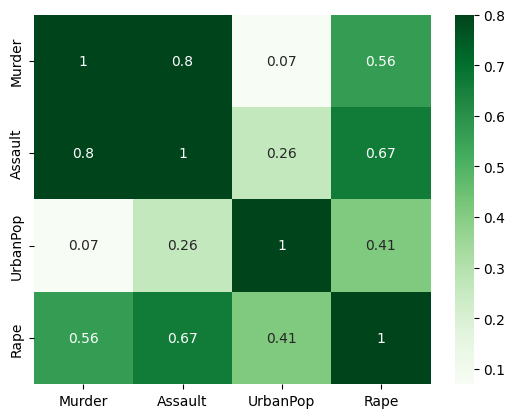

In [392]:
# Chekcing Relationship between each columns
# There is good releationship between

df1 =df.iloc[:,1:]
sns.heatmap(df1.corr(),annot=True,cmap="Greens",vmax=.8)
plt.Figure(figsize=(12,12))

C:\Users\Mohan Gola\AppData\Local\Temp\ipykernel_17220\3486429347.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Murder'])


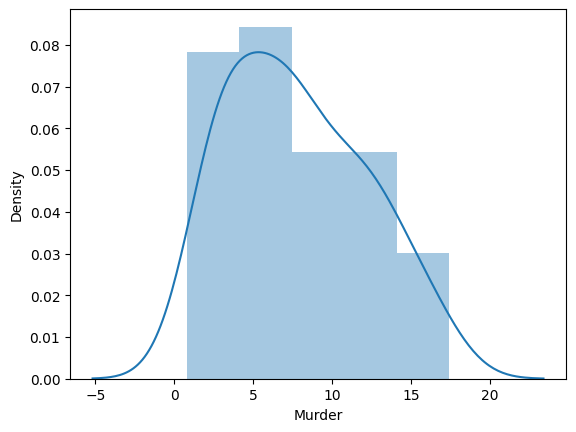

In [393]:
# Data Distribtuion of each Numerical Column

sns.distplot(df['Murder'])
plt.show()

C:\Users\Mohan Gola\AppData\Local\Temp\ipykernel_17220\4265808380.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Assault'])


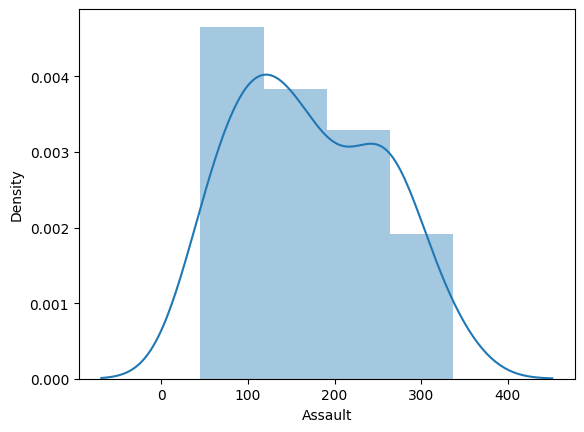

In [394]:
sns.distplot(df['Assault'])
plt.show()

C:\Users\Mohan Gola\AppData\Local\Temp\ipykernel_17220\1359906988.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Rape'])


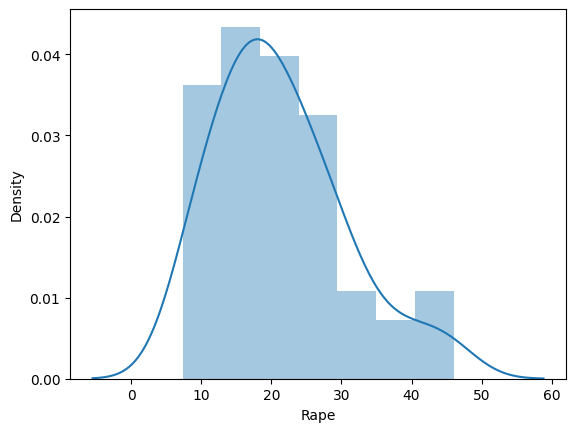

In [395]:
sns.distplot(df['Rape'])
plt.show()

C:\Users\Mohan Gola\AppData\Local\Temp\ipykernel_17220\2601721346.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['UrbanPop'])


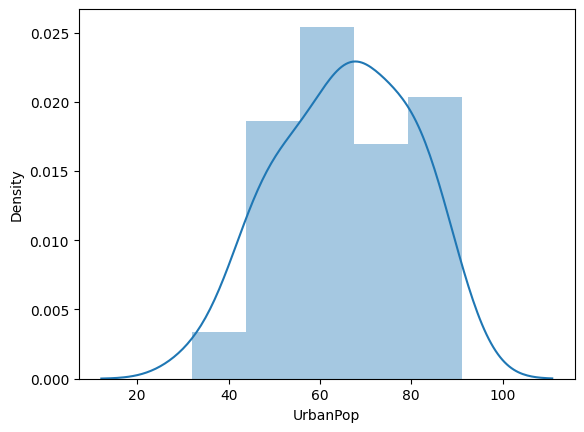

In [396]:
sns.distplot(df['UrbanPop'])
plt.show()

From Above Four Graphs we can say that data is normally Distributed

In [397]:
# Performing Some EDA Techniques

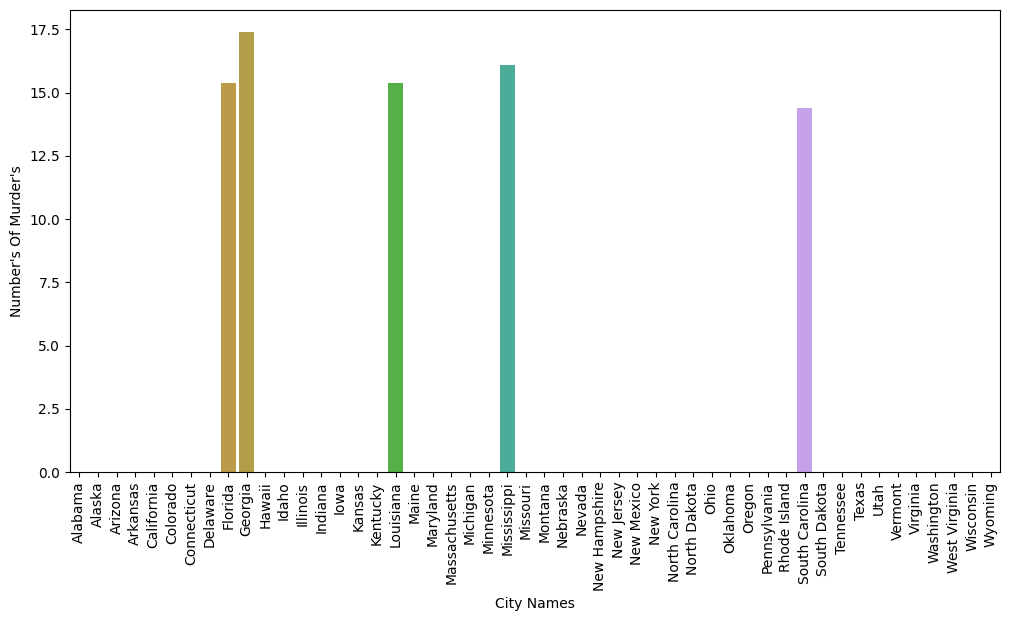

In [398]:
# Top Five City with Most Murder's 

plt.figure(figsize=(12,6))
sns.barplot(data=df,x = df['City'],y =df['Murder'].sort_values(ascending=False)[0:5])
plt.xlabel('City Names')
plt.ylabel("Number's Of Murder's")
plt.xticks(rotation=90)
plt.show()

Top Five City With Most Number of Murders's Cases are Georgia,Mississippi,Louisiana,Florida,South Carolina

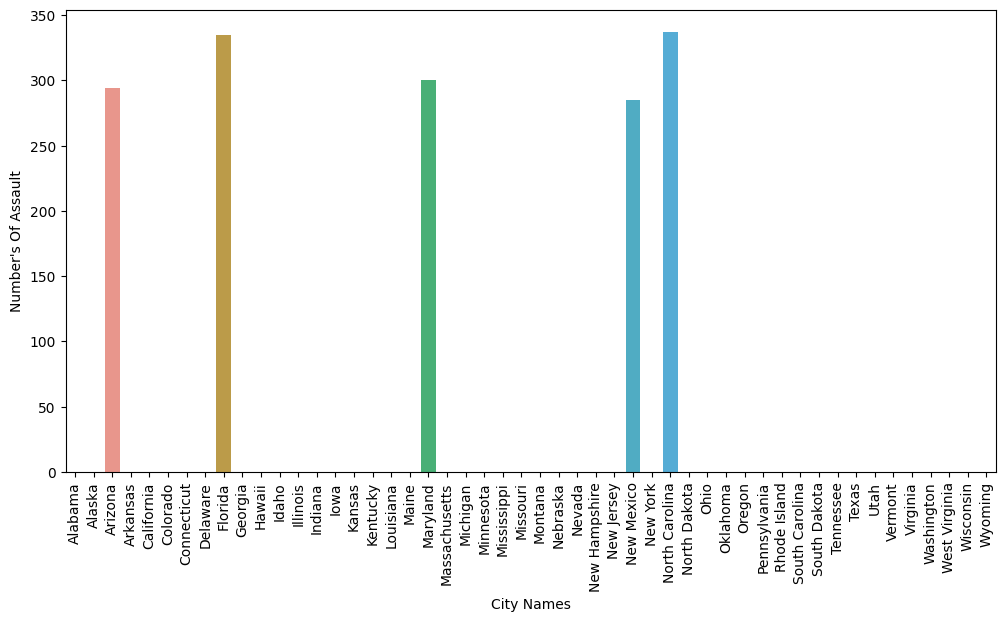

In [399]:
plt.figure(figsize=(12,6))
sns.barplot(data=df,x = df['City'],y =df['Assault'].sort_values(ascending=False)[0:5])
plt.xlabel('City Names')
plt.ylabel("Number's Of Assault")
plt.xticks(rotation=90)
plt.show()

Top Five City With Most Number of Assault's Cases are North Carolina,Florida,Matyland,Arizona,New Mexico

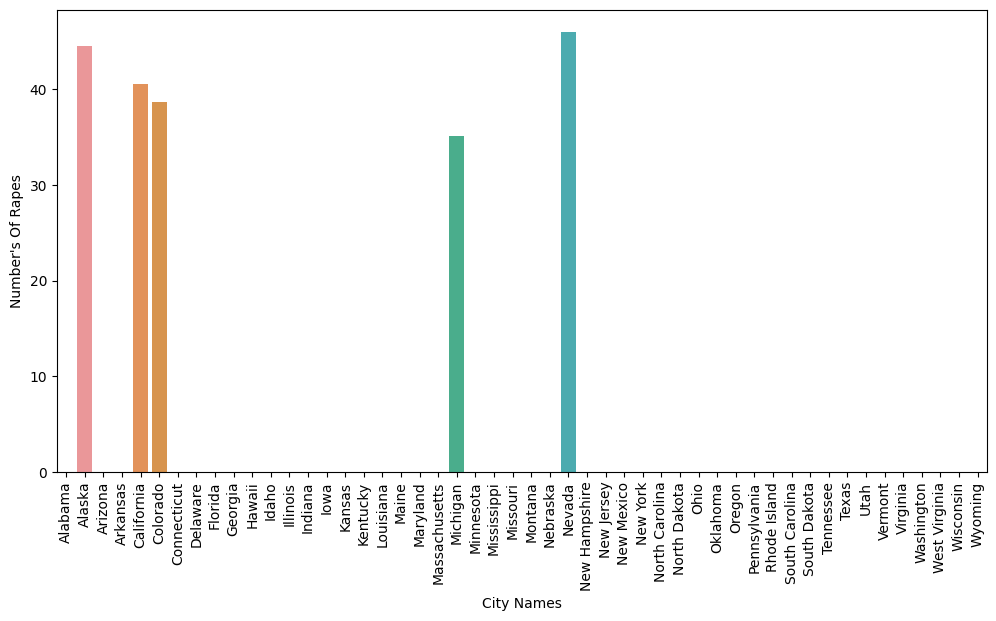

In [400]:
plt.figure(figsize=(12,6))
sns.barplot(data=df,x = df['City'],y =df['Rape'].sort_values(ascending=False)[0:5])
plt.xlabel('City Names')
plt.ylabel("Number's Of Rapes")
plt.xticks(rotation=90)
plt.show()

Top Five City With Most Number of Rape Cases are Nevada,Alaska,California,Colorado,Michigan

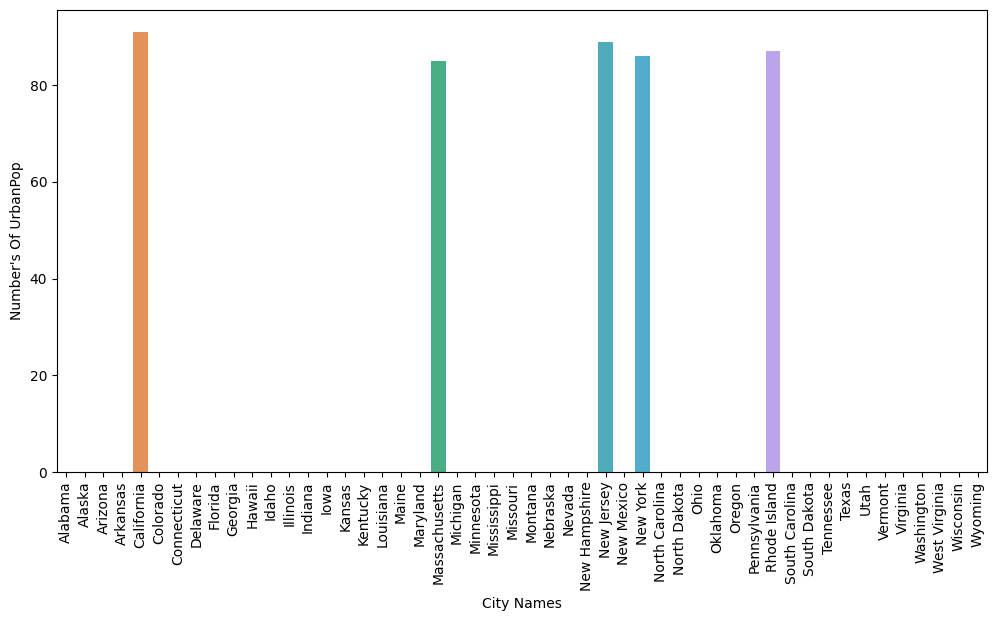

In [401]:
plt.figure(figsize=(12,6))
sns.barplot(data=df,x = df['City'],y =df['UrbanPop'].sort_values(ascending=False)[0:5])
plt.xlabel('City Names')
plt.ylabel("Number's Of UrbanPop")
plt.xticks(rotation=90)
plt.show()

Top Five City With Most Number of UrbanPop Cases are California,New Jersey,Rhode Island,New York,Massahusetts

Text(0, 0.5, 'WCSS')

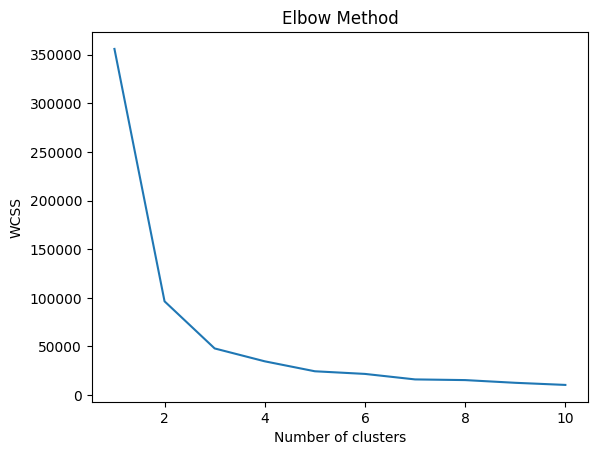

In [402]:
# Performinhg Clustering Usiong K-menas Clustering
# How to find optimum number of  cluster
#The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum-of-squares criterion:

from sklearn.cluster import KMeans
wcss = [] # list to contain inertia for different no. of clusters
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, n_init= 'auto' , random_state=42)
    kmeans.fit(df.iloc[:,1:])
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')



In [403]:
## Create a K-means clustering model

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 2, init='k-means++', n_init = 'auto', random_state=42, algorithm= "lloyd")

kmeans.fit(df.iloc[:,1:])

df['Clusters'] = kmeans.fit_predict(df.iloc[:,1:])

collections.Counter(kmeans.labels_)


Counter({0: 29, 1: 21})

In [404]:
df['Clusters'].value_counts()

Clusters
0    29
1    21
Name: count, dtype: int64

(array([-50.,   0.,  50., 100., 150., 200., 250., 300., 350., 400.]),
 [Text(-50.0, 0, '−50'),
  Text(0.0, 0, '0'),
  Text(50.0, 0, '50'),
  Text(100.0, 0, '100'),
  Text(150.0, 0, '150'),
  Text(200.0, 0, '200'),
  Text(250.0, 0, '250'),
  Text(300.0, 0, '300'),
  Text(350.0, 0, '350'),
  Text(400.0, 0, '400')])

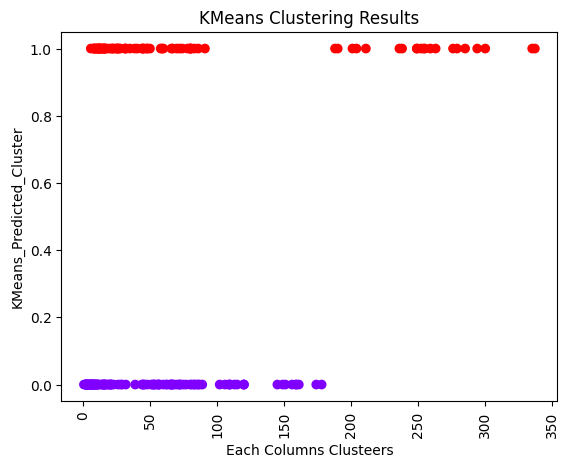

In [405]:
# Visualize the clustered data points
plt.scatter(df.iloc[:,1], df.Clusters, c=df.Clusters, cmap='rainbow')
plt.scatter(df.iloc[:,2], df.Clusters, c=df.Clusters, cmap='rainbow')
plt.scatter(df.iloc[:,3], df.Clusters, c=df.Clusters, cmap='rainbow')
plt.scatter(df.iloc[:,4], df.Clusters, c=df.Clusters, cmap='rainbow')
plt.title('KMeans Clustering Results')
plt.xlabel("Each Columns Clusteers")
plt.ylabel('KMeans_Predicted_Cluster')
plt.xticks(rotation=90)

In [426]:
print('silhouette_score for KMeans Model is When Value of k = 2:', round(silhouette_score(df.iloc[:,1:],df['Clusters'])*100, 2), '%')

silhouette_score for KMeans Model is When Value of k = 2: 59.27 %


In [407]:
df3 = df.drop(columns=['Clusters'])
df3.head()

,City,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [408]:
## Create a K-means clustering model

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 3, init='k-means++', n_init = 'auto', random_state=42, algorithm= "lloyd")

kmeans.fit(df3.iloc[:,1:])

df3['Clusters'] = kmeans.fit_predict(df3.iloc[:,1:])

collections.Counter(kmeans.labels_)


Counter({0: 20, 1: 16, 2: 14})

In [409]:
df3['Clusters'].value_counts()

Clusters
0    20
1    16
2    14
Name: count, dtype: int64

(array([-50.,   0.,  50., 100., 150., 200., 250., 300., 350., 400.]),
 [Text(-50.0, 0, '−50'),
  Text(0.0, 0, '0'),
  Text(50.0, 0, '50'),
  Text(100.0, 0, '100'),
  Text(150.0, 0, '150'),
  Text(200.0, 0, '200'),
  Text(250.0, 0, '250'),
  Text(300.0, 0, '300'),
  Text(350.0, 0, '350'),
  Text(400.0, 0, '400')])

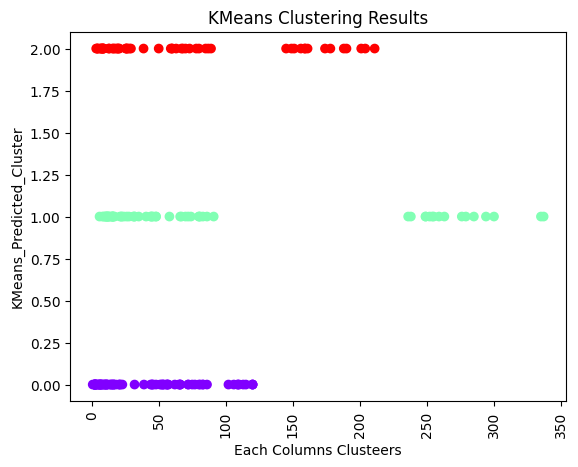

In [410]:
# Visualize the clustered data points
plt.scatter(df3.iloc[:,1], df3.Clusters, c=df3.Clusters, cmap='rainbow')
plt.scatter(df3.iloc[:,2], df3.Clusters, c=df3.Clusters, cmap='rainbow')
plt.scatter(df3.iloc[:,3], df3.Clusters, c=df3.Clusters, cmap='rainbow')
plt.scatter(df3.iloc[:,4], df3.Clusters, c=df3.Clusters, cmap='rainbow')
plt.title('KMeans Clustering Results')
plt.xlabel("Each Columns Clusteers")
plt.ylabel('KMeans_Predicted_Cluster')
plt.xticks(rotation=90)

In [427]:
print('silhouette_score for KMeans Model When k value = 3', round(silhouette_score(df3.iloc[:,1:],df3['Clusters'])*100, 2), '%')

silhouette_score for KMeans Model When k value = 3 53.2 %


# Hierarchical/Agglomerative_Clustering

In [412]:
df_hier = df.drop(columns=['Clusters'])

In [413]:
df_hier.head()

,City,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


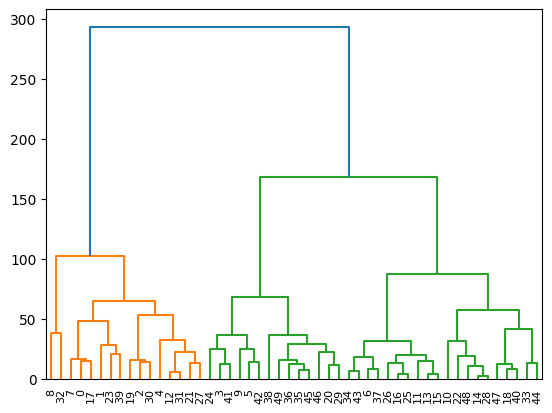

In [414]:
from scipy.cluster.hierarchy import dendrogram, linkage
dendo = dendrogram(linkage(df_hier.iloc[:,1:], method='complete'))

From Above Dendograph we can see that there are 2 clusters possible


In [415]:
# create model for hierachical clusters
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage = 'complete')

# fitting data
model.fit(df_hier.iloc[:,1:])

# prediction
y_pred= model.fit_predict(df_hier.iloc[:,1:])

# storing predcited data in main data
df_hier['Hierachical_Predicted_Cluster']=y_pred

# sorting of data based on predicted data
df_hier=df_hier.sort_values('Hierachical_Predicted_Cluster')

df_hier.iloc[:,[0,-1]].tail(10)

,City,Hierachical_Predicted_Cluster
21,Michigan,1
32,North Carolina,1
31,New York,1
30,New Mexico,1
27,Nevada,1
17,Louisiana,1
19,Maryland,1
23,Mississippi,1
39,South Carolina,1
0,Alabama,1


In [416]:
collections.Counter(model.labels_)

Counter({0: 34, 1: 16})

(array([-50.,   0.,  50., 100., 150., 200., 250., 300., 350., 400.]),
 [Text(-50.0, 0, '−50'),
  Text(0.0, 0, '0'),
  Text(50.0, 0, '50'),
  Text(100.0, 0, '100'),
  Text(150.0, 0, '150'),
  Text(200.0, 0, '200'),
  Text(250.0, 0, '250'),
  Text(300.0, 0, '300'),
  Text(350.0, 0, '350'),
  Text(400.0, 0, '400')])

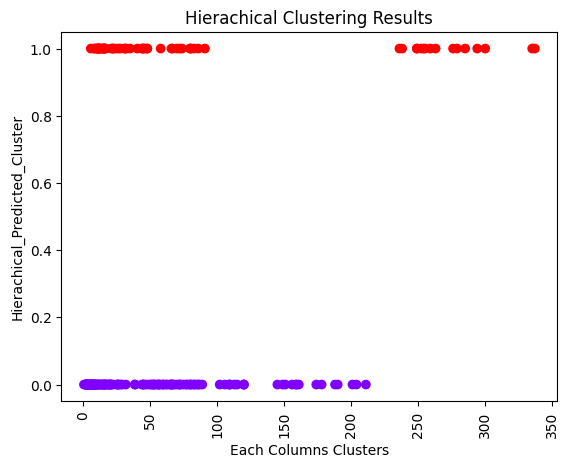

In [417]:
# Visualize the clustered data points
plt.scatter(df_hier.iloc[:,1], df_hier.Hierachical_Predicted_Cluster, c=df_hier.Hierachical_Predicted_Cluster, cmap='rainbow')
plt.scatter(df_hier.iloc[:,2], df_hier.Hierachical_Predicted_Cluster, c=df_hier.Hierachical_Predicted_Cluster, cmap='rainbow')
plt.scatter(df_hier.iloc[:,3], df_hier.Hierachical_Predicted_Cluster, c=df_hier.Hierachical_Predicted_Cluster, cmap='rainbow')
plt.scatter(df_hier.iloc[:,4], df_hier.Hierachical_Predicted_Cluster, c=df_hier.Hierachical_Predicted_Cluster, cmap='rainbow')
plt.title('Hierachical Clustering Results')
plt.xlabel("Each Columns Clusters")
plt.ylabel('Hierachical_Predicted_Cluster')
plt.xticks(rotation=90)

In [428]:
print('silhouette_score for Hierechical_clustering Model is:', round(silhouette_score(df_hier.iloc[:,1:],df_hier['Hierachical_Predicted_Cluster'])*100, 2), '%')

silhouette_score for Hierechical_clustering Model is: 57.63 %


# DBSCAN Alogrithm

In [419]:
df.head()

,City,Murder,Assault,UrbanPop,Rape,Clusters
0,Alabama,13.2,236,58,21.2,1
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,1


In [420]:
dbsc = df.drop(columns=['City','Clusters'],axis=1)
dbsc.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


In [421]:
stscaler = StandardScaler()
X = stscaler.fit_transform(dbsc)

In [422]:
from sklearn.cluster import DBSCAN

model1 = DBSCAN(eps=3,min_samples=4)
model1.fit_predict(dbsc)

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
      dtype=int64)

In [423]:
cl=pd.DataFrame(model1.labels_,columns=['cluster'])
cl.head()

,cluster
0,-1
1,-1
2,-1
3,-1
4,-1


In [424]:
db_scan = pd.concat([dbsc,cl],axis=1)
db_scan

,Murder,Assault,UrbanPop,Rape,cluster
0,13.2,236,58,21.2,-1
1,10.0,263,48,44.5,-1
2,8.1,294,80,31.0,-1
3,8.8,190,50,19.5,-1
4,9.0,276,91,40.6,-1
5,7.9,204,78,38.7,-1
6,3.3,110,77,11.1,-1
7,5.9,238,72,15.8,-1
8,15.4,335,80,31.9,-1
9,17.4,211,60,25.8,-1


(array([-50.,   0.,  50., 100., 150., 200., 250., 300., 350., 400.]),
 [Text(-50.0, 0, '−50'),
  Text(0.0, 0, '0'),
  Text(50.0, 0, '50'),
  Text(100.0, 0, '100'),
  Text(150.0, 0, '150'),
  Text(200.0, 0, '200'),
  Text(250.0, 0, '250'),
  Text(300.0, 0, '300'),
  Text(350.0, 0, '350'),
  Text(400.0, 0, '400')])

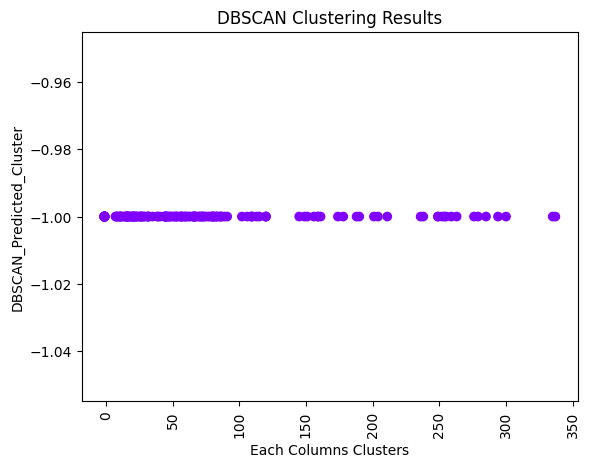

In [425]:
plt.scatter(db_scan.iloc[:,1],db_scan.cluster,c = db_scan.cluster,cmap='rainbow')
plt.scatter(db_scan.iloc[:,2],db_scan.cluster,c = db_scan.cluster,cmap='rainbow')
plt.scatter(db_scan.iloc[:,3],db_scan.cluster,c = db_scan.cluster,cmap='rainbow')
plt.scatter(db_scan.iloc[:,4],db_scan.cluster,c = db_scan.cluster,cmap='rainbow')
plt.title('DBSCAN Clustering Results')
plt.xlabel("Each Columns Clusters")
plt.ylabel('DBSCAN_Predicted_Cluster')
plt.xticks(rotation=90)

silhouette_score for K-means Clustering When value of k = 2 is 59.27 %<br>
silhouette_score for K-means Clustering When value of k = 3 is 53.20 %<br>
silhouette_score for Hierechical_clustering is 53.20 %<br>
From Above Analysis The Best silhouette_score is for K-Means Clustering Algorithm when the value of k = 2<br>
So We can use Kmeans Clustering for Future Purpose<br>
As the Data is in Small amount the Dbscan Model is not preforming Well.